/content


In [37]:
!nvidia-smi

Mon May 20 20:00:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              43W / 400W |      5MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [38]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [39]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 30.9/201.2 GB disk)


In [40]:
from ultralytics import YOLO

from IPython.display import display, Image

In [55]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="yfh2gQAdogc7QL7bb0Lk")
project = rf.workspace("thesis-efvhn").project("final-dataset-4")
version = project.version(1)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FINAL-DATASET-4-1 in yolov8:: 100%|██████████| 38772/38772 [00:04<00:00, 9146.30it/s] 


In [57]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=416 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/FINAL-DATASET-4-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=

In [58]:
!ls {HOME}/runs/detect/train7

args.yaml					     PR_curve.png	    val_batch0_pred.jpg
confusion_matrix_normalized.png			     R_curve.png	    val_batch1_labels.jpg
confusion_matrix.png				     results.csv	    val_batch1_pred.jpg
events.out.tfevents.1716241076.96b5e604d4f8.68245.0  results.png	    val_batch2_labels.jpg
F1_curve.png					     train_batch0.jpg	    val_batch2_pred.jpg
labels_correlogram.jpg				     train_batch1.jpg	    weights
labels.jpg					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg


/content


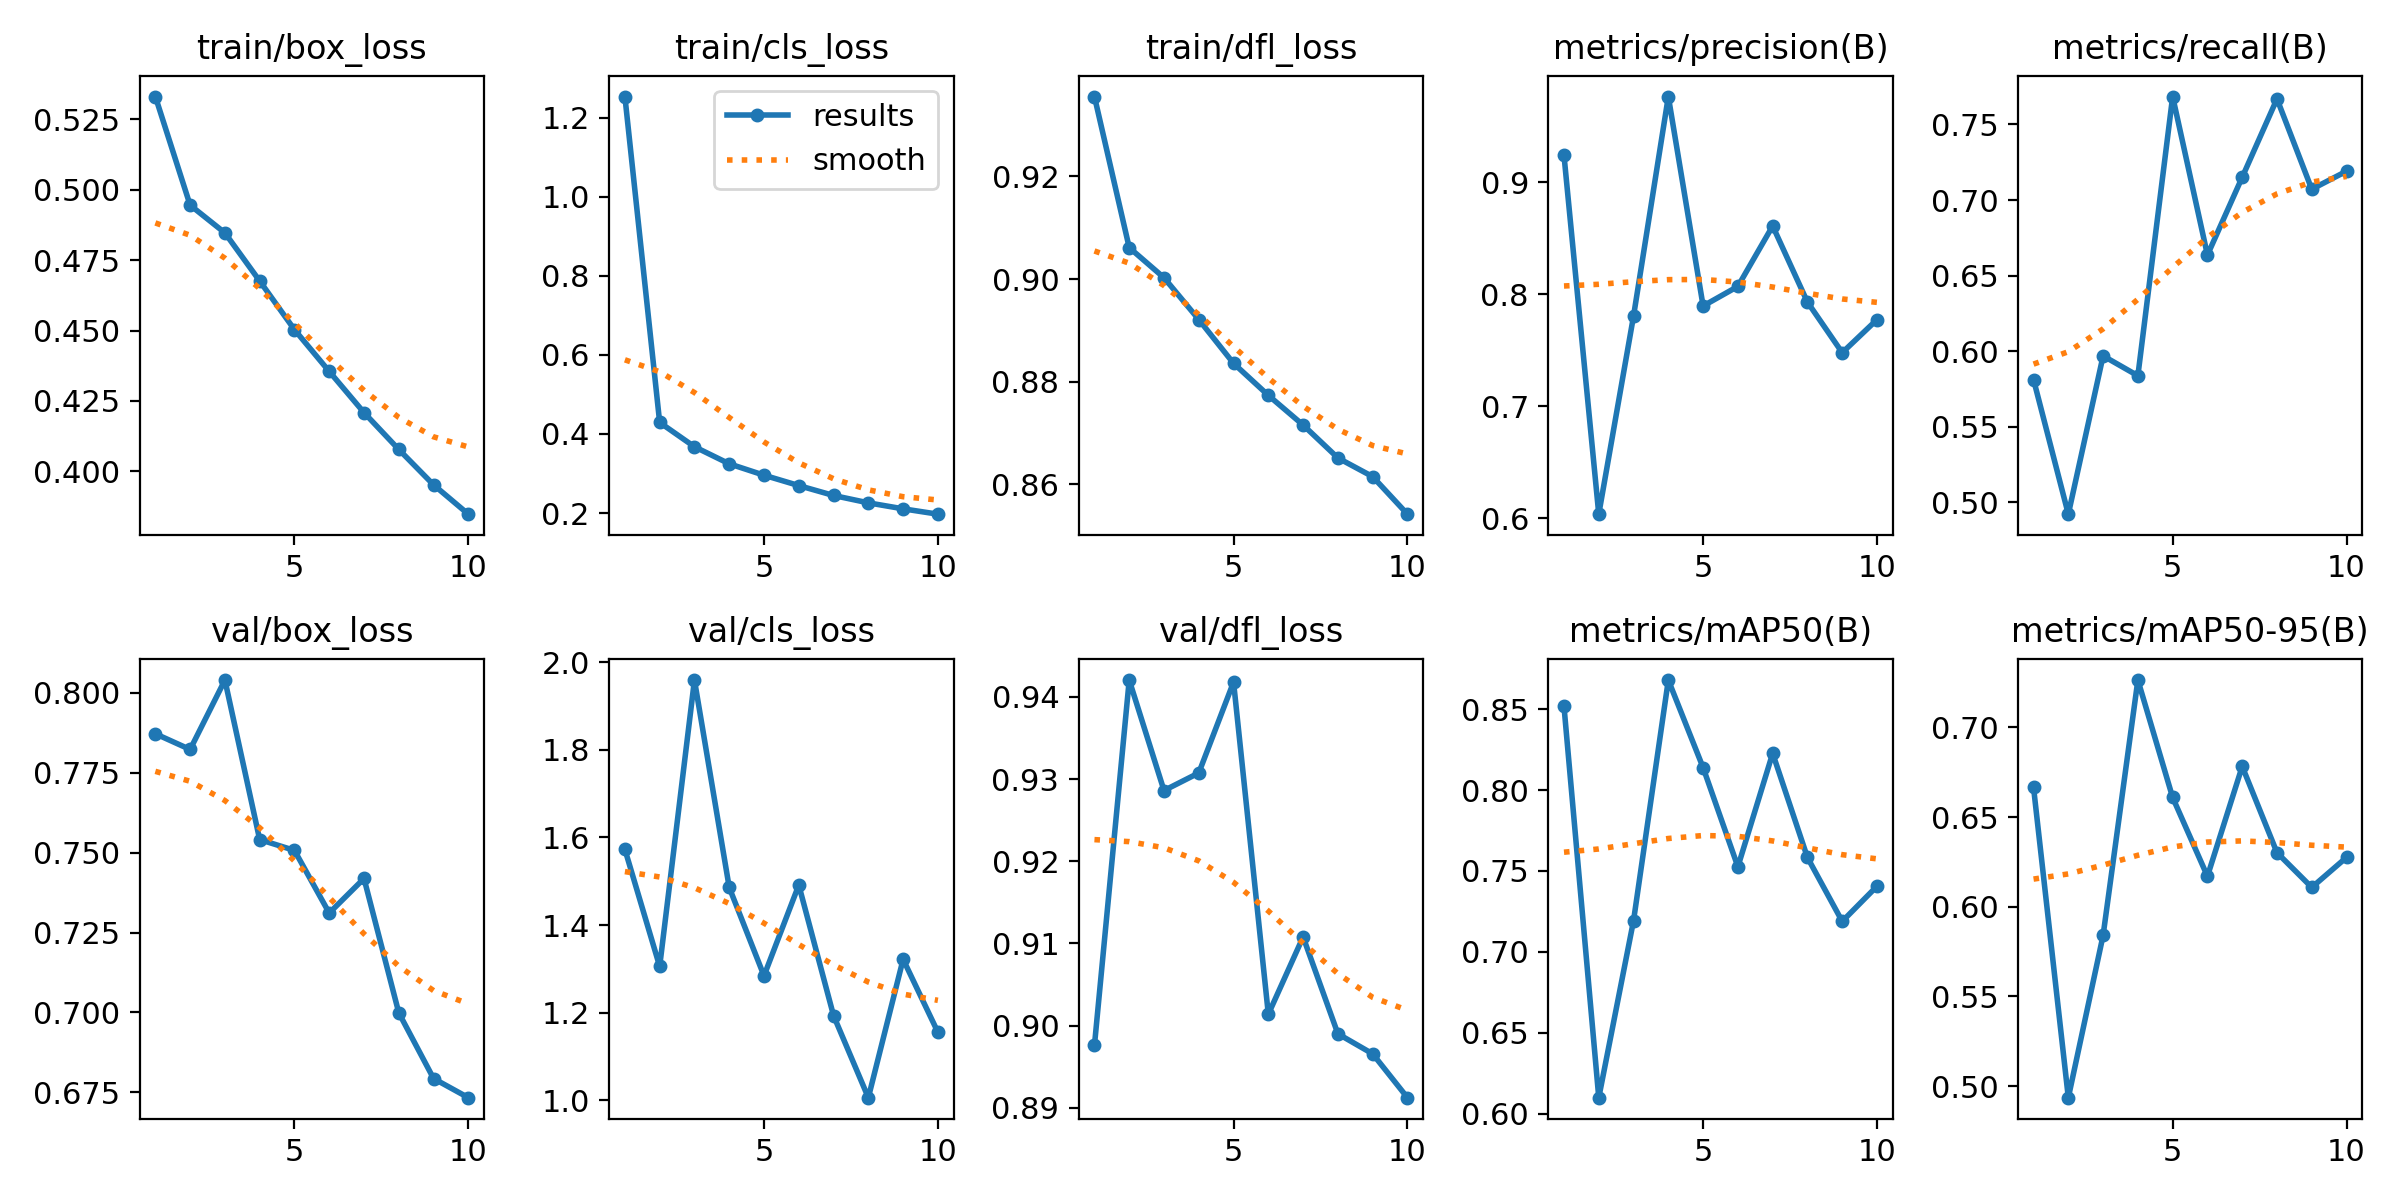

In [59]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/results.png', width=600)

/content


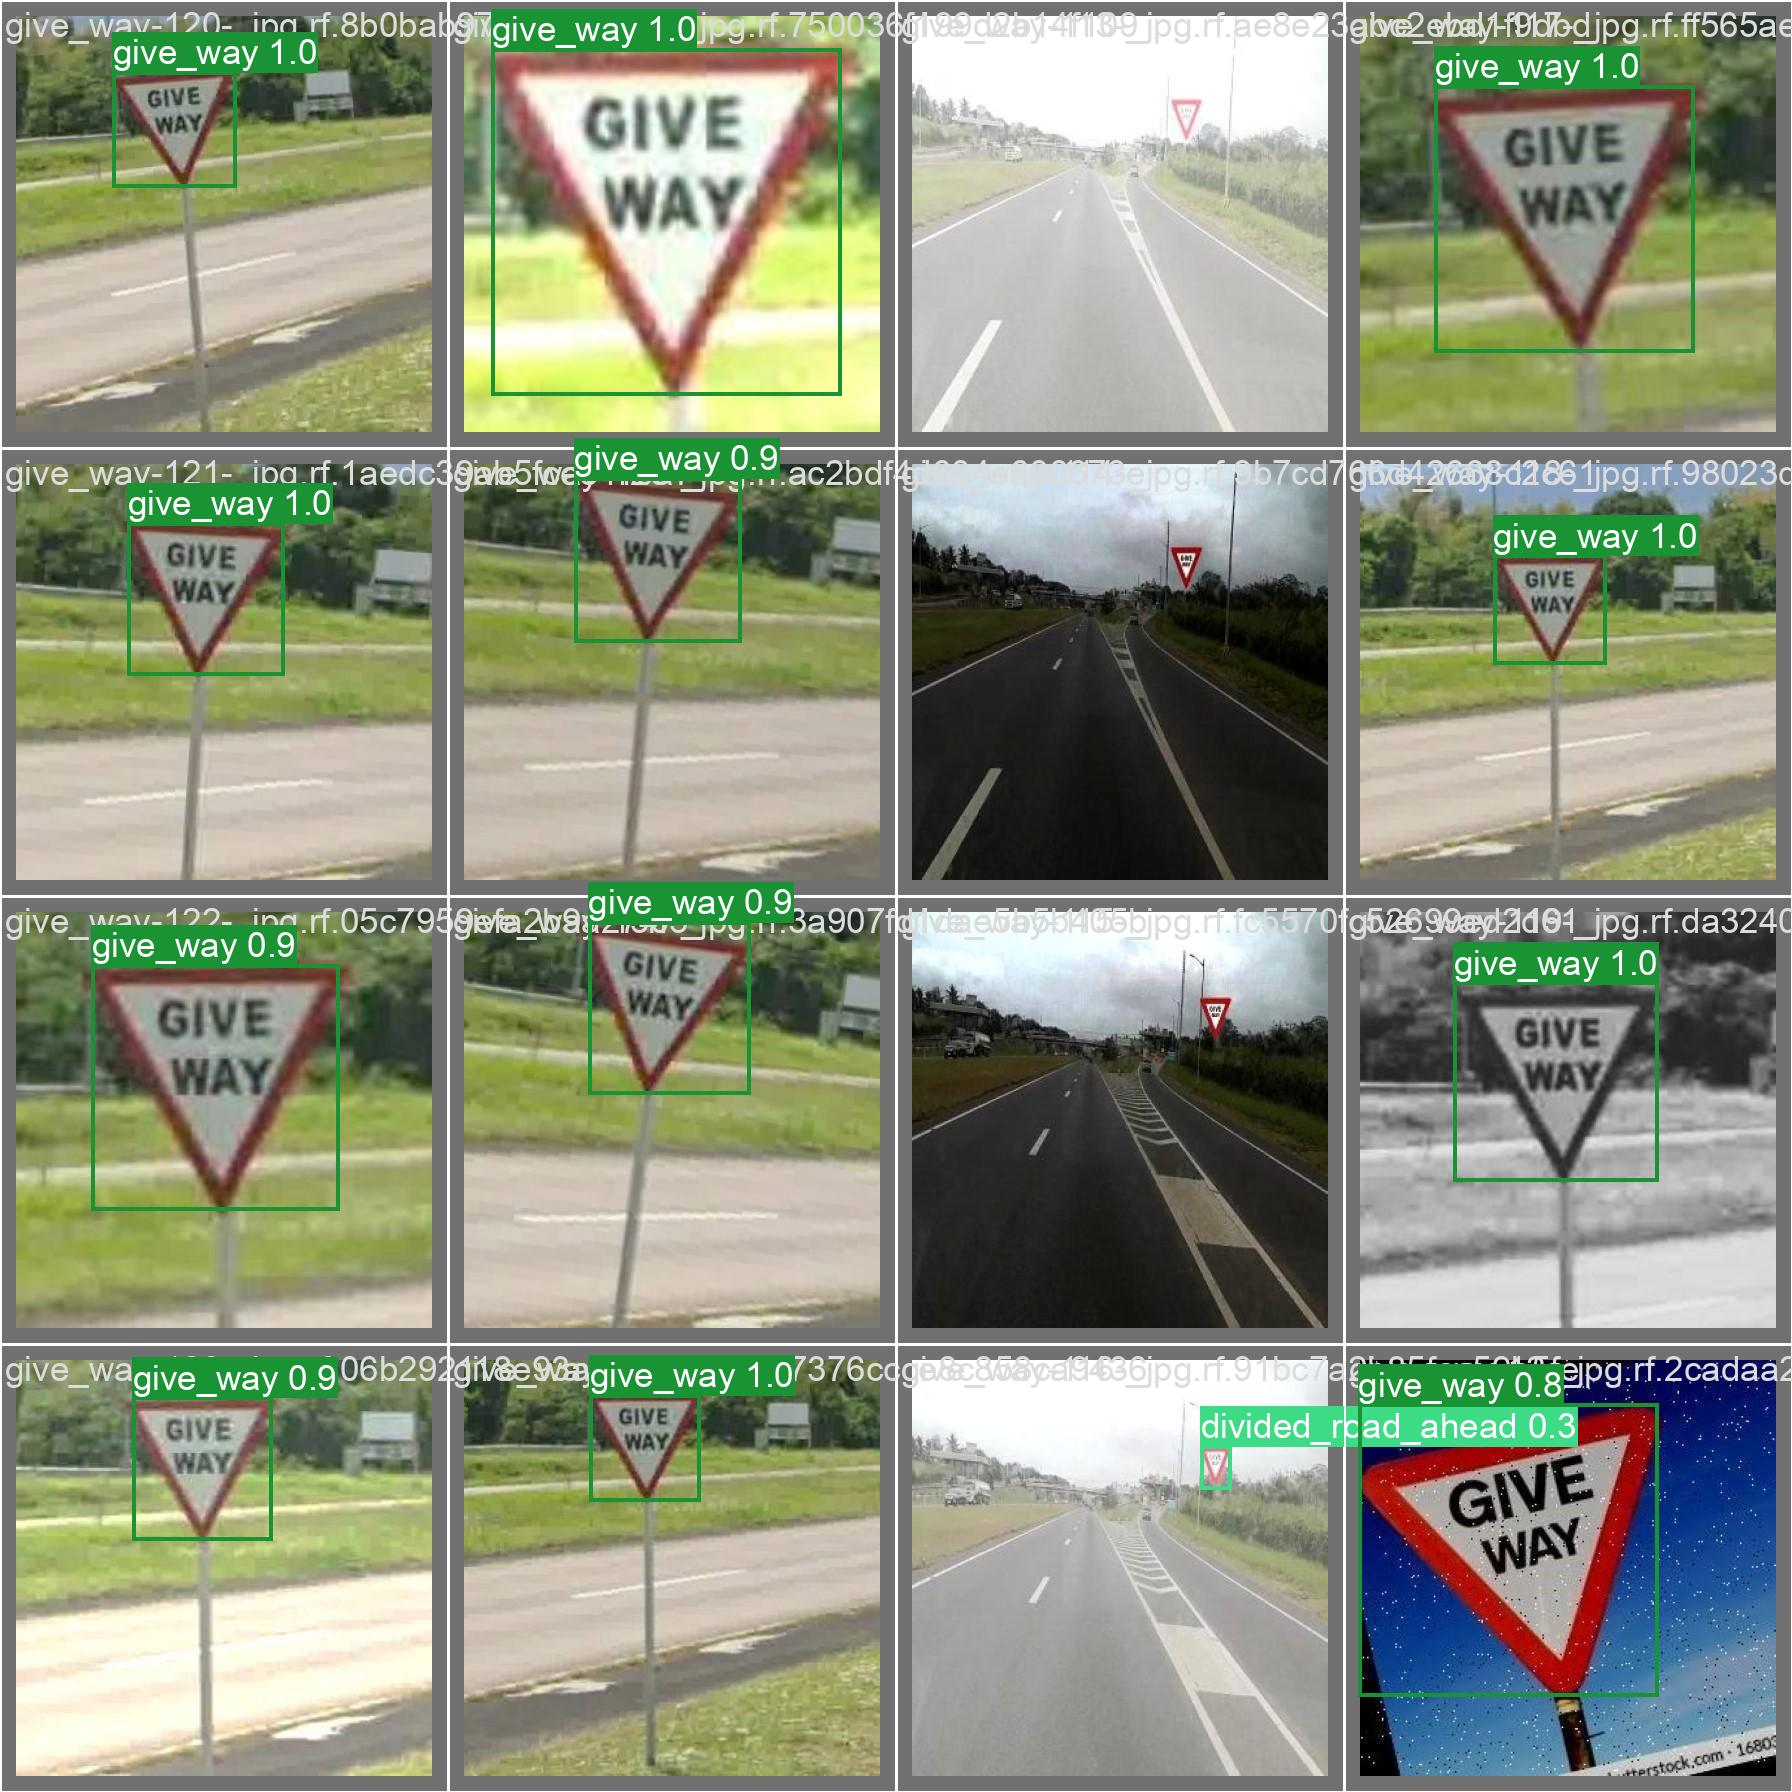

In [61]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/val_batch1_pred.jpg', width=600)

In [62]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train7/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11132163 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/FINAL-DATASET-4-1/valid/labels.cache... 1938 images, 0 backgrounds, 0 corrupt: 100% 1938/1938 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 122/122 [00:09<00:00, 12.86it/s]
                   all       1938       1949      0.977      0.584      0.868      0.726
     4.27_height_limit       1938          4          1       0.73       0.75      0.632
              give_way       1938        938       0.93      0.594      0.927      0.775
      pass_either_side       1938      

In [63]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train7/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11132163 parameters, 0 gradients, 28.5 GFLOPs

image 1/1938 /content/datasets/FINAL-DATASET-4-1/test/images/40KPH-SPEED-LIMIT-204-_jpg.rf.fc8a0ff04edce5c1d989d9021147dd8f.jpg: 416x416 1 40kph_speed_limit, 7.9ms
image 2/1938 /content/datasets/FINAL-DATASET-4-1/test/images/40KPH-SPEED-LIMIT-206-_jpg.rf.3fb4d287788a503678ebf6a10f28e4b3.jpg: 416x416 1 40kph_speed_limit, 8.3ms
image 3/1938 /content/datasets/FINAL-DATASET-4-1/test/images/40KPH-SPEED-LIMIT-207-_jpg.rf.2c8097da790f5fa9e71c7d225f2a7846.jpg: 416x416 1 40kph_speed_limit, 7.3ms
image 4/1938 /content/datasets/FINAL-DATASET-4-1/test/images/40KPH-SPEED-LIMIT-208-_jpg.rf.d526d9ea052e66421c80871cdc31e133.jpg: 416x416 1 40kph_speed_limit, 7.1ms
image 5/1938 /content/datasets/FINAL-DATASET-4-1/test/images/40KPH-SPEED-LIMIT-209-_jpg.rf.6d8d2e2255163484c93953fc81f5ebce.jpg: 416x416 1 40kph_speed_l

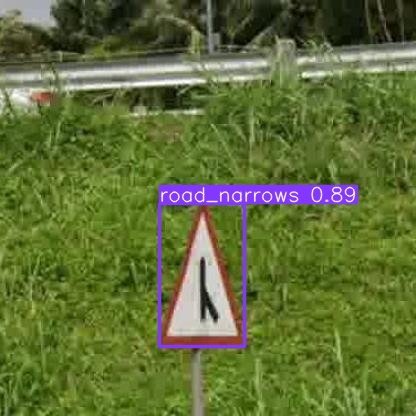

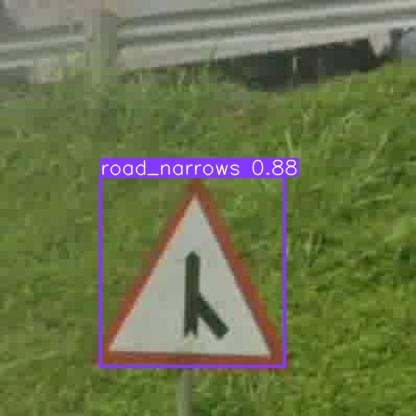

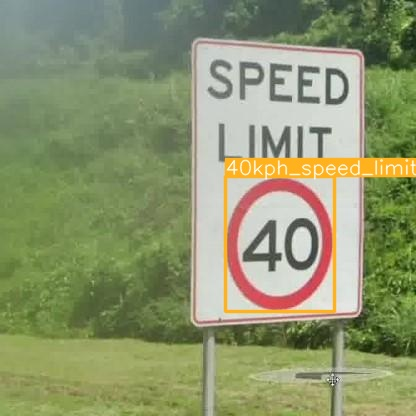

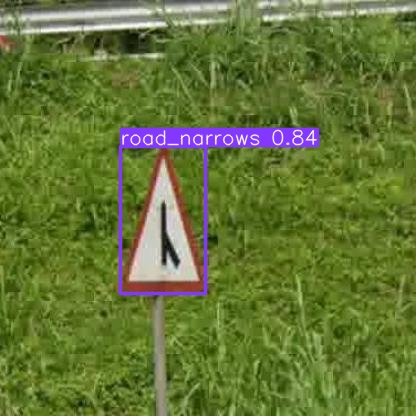

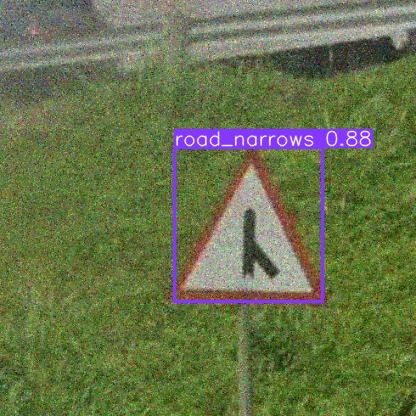

In [65]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")